In [2]:
import pandas as pd
import numpy as np

In [3]:
# one month of stock history data
omh = pd.read_csv("data/omh.csv")
omh

,Date,MSFT,AAPL
0,2014-12-01,48.62,115.07
1,2014-12-02,48.46,114.63
2,2014-12-03,48.08,115.93
3,2014-12-04,48.84,115.49
4,2014-12-05,48.42,115.00
5,2014-12-08,47.70,112.40
6,2014-12-09,47.59,114.12
7,2014-12-10,46.90,111.95
8,2014-12-11,47.17,111.62
9,2014-12-12,46.95,109.73


In [4]:
omh.describe()

,MSFT,AAPL
count,22.000000,22.000000
mean,47.493182,112.411364
std,0.933077,2.388772
min,45.160000,106.750000
25%,46.967500,111.660000
50%,47.625000,112.530000
75%,48.125000,114.087500
max,48.840000,115.930000


In [5]:
omh.mean()

MSFT     47.493182
AAPL    112.411364
dtype: float64

In [6]:
omh.median()

MSFT     47.625
AAPL    112.530
dtype: float64

In [7]:
omh.var()

MSFT    0.870632
AAPL    5.706231
dtype: float64

In [8]:
omh.std()

MSFT    0.933077
AAPL    2.388772
dtype: float64

In [9]:
# correlation of MSFT relative to AAPL
omh.MSFT.corr(omh.AAPL)

0.8641560684381171

In [10]:
omh[['MSFT', 'AAPL']].max()

MSFT     48.84
AAPL    115.93
dtype: float64

In [11]:
omh[['MSFT', 'AAPL']].min()

MSFT     45.16
AAPL    106.75
dtype: float64

In [12]:
omh[['MSFT', 'AAPL']].idxmax()

MSFT    3
AAPL    2
dtype: int64

In [13]:
omh[['MSFT', 'AAPL']].idxmin()

MSFT    11
AAPL    11
dtype: int64

In [14]:
omh.nlargest(4, ['MSFT'])

,Date,MSFT,AAPL
3,2014-12-04,48.84,115.49
0,2014-12-01,48.62,115.07
1,2014-12-02,48.46,114.63
16,2014-12-23,48.45,112.54


In [15]:
omh.nsmallest(4, ['MSFT'])

,Date,MSFT,AAPL
11,2014-12-16,45.16,106.75
12,2014-12-17,45.74,109.41
21,2014-12-31,46.45,110.38
10,2014-12-15,46.67,108.23


In [16]:
omh.MSFT.nsmallest(4)

11    45.16
12    45.74
21    46.45
10    46.67
Name: MSFT, dtype: float64

In [17]:
# calculate % change on MSFT
omh[['MSFT']].pct_change()[:5]

,MSFT
0,NaN
1,-0.003291
2,-0.007842
3,0.015807
4,-0.008600


In [18]:
pd.Series([1, 2, 3, 4]).cumprod()

0     1
1     2
2     6
3    24
dtype: int64

In [19]:
pd.Series([1, 2, 3, 4]).cumsum()

0     1
1     3
2     6
3    10
dtype: int64

In [20]:
pd.Series([5, 2, 3, 4]).rank()

0    4.0
1    1.0
2    2.0
3    3.0
dtype: float64

In [21]:
s = pd.Series(['a', 'a', 'b', 'c', np.NaN])
s.count()

4

In [22]:
s.unique()

array(['a', 'b', 'c', nan], dtype=object)

In [23]:
s.nunique(), s.nunique(dropna=False)

(3, 4)

In [24]:
s.value_counts(dropna=False)

a      2
b      1
c      1
NaN    1
dtype: int64

In [25]:
np.random.seed(123456)
dist = np.random.normal(size = 10000)
dist.mean(), dist.std()

(-0.002863324040906651, 1.008716203199891)

In [26]:
bins_right = pd.cut(dist, 5)
bins_left = pd.cut(dist, 5, right=False)
bins_right

[(-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-2.077, -0.633], (0.81, 2.254], ..., (-2.077, -0.633], (-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-0.633, 0.81]]
Length: 10000
Categories (5, interval[float64]): [(-3.528, -2.077] < (-2.077, -0.633] < (-0.633, 0.81] < (0.81, 2.254] < (2.254, 3.698]]

In [27]:
bins_left

[[-0.633, 0.81), [-0.633, 0.81), [-2.077, -0.633), [-2.077, -0.633), [0.81, 2.254), ..., [-2.077, -0.633), [-0.633, 0.81), [-0.633, 0.81), [-2.077, -0.633), [-0.633, 0.81)]
Length: 10000
Categories (5, interval[float64]): [[-3.521, -2.077) < [-2.077, -0.633) < [-0.633, 0.81) < [0.81, 2.254) < [2.254, 3.705)]

In [28]:
# cut into quantiles
# 5 bins with an equal quantity of items
qbins_right = pd.qcut(dist, 5)
qbins_right.describe()

,counts,freqs
categories,,
"(-3.522, -0.861]",2000,0.2
"(-0.861, -0.241]",2000,0.2
"(-0.241, 0.261]",2000,0.2
"(0.261, 0.866]",2000,0.2
"(0.866, 3.698]",2000,0.2


In [29]:
# generate 50 ages between 6 and 45
np.random.seed(123456)
ages = np.random.randint(6, 45, 50)
ages

array([ 7, 33, 38, 29, 42, 14, 16, 16, 18, 17, 26, 28, 44, 40, 20, 12,  8,
       10, 36, 29, 26, 26, 11, 29, 42, 17, 41, 35, 22, 40, 24, 21, 38, 33,
       26, 23, 16, 34, 26, 20, 18, 42, 27, 13, 37, 37, 10,  7, 10, 23])

In [30]:
ranges = [6, 12, 18, 35, 50]
agebins = pd.cut(ages, ranges)
agebins.describe()

,counts,freqs
categories,,
"(6, 12]",8,0.16
"(12, 18]",9,0.18
"(18, 35]",21,0.42
"(35, 50]",12,0.24


In [31]:
ranges = [6, 12, 18, 35, 50]
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged']
agebins = pd.cut(ages, ranges, labels=labels)
agebins.describe()

,counts,freqs
categories,,
Youth,8,0.16
Young Adult,9,0.18
Adult,21,0.42
Middle Aged,12,0.24


In [32]:
# make the quantiles at the +/- 3, 2 and 1 std deviations
quantiles = [0,
             0.001, 
             0.021,
             0.5-0.341,
             0.5,
             0.5+0.341,
             1.0-0.021,
             1.0-0.001,
             1.0]
qbin = pd.qcut(dist, quantiles)
# this data should be a perfect normal distribution
qbin.describe()

,counts,freqs
categories,,
"(-3.522, -3.131]",10,0.001
"(-3.131, -2.056]",200,0.020
"(-2.056, -1.033]",1380,0.138
"(-1.033, -0.00363]",3410,0.341
"(-0.00363, 1.011]",3410,0.341
"(1.011, 2.043]",1380,0.138
"(2.043, 3.062]",200,0.020
"(3.062, 3.698]",10,0.001


In [33]:
np.random.seed(123456)
s = pd.Series(np.random.randn(1000)).cumsum()
#rolling 3 days
r3 = s.rolling(window=3)
r3

Rolling [window=3,center=False,axis=0]

In [34]:
#rolling 10days
r10 = s.rolling(window=10)
r10

Rolling [window=10,center=False,axis=0]

In [35]:
#rolling 20days
r20 = s.rolling(window=20)
r20

Rolling [window=20,center=False,axis=0]

In [36]:
s[0:100].plot()

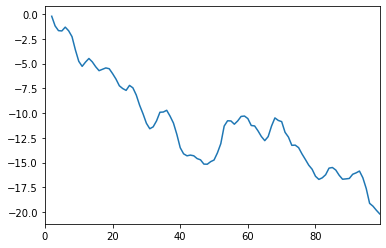

In [37]:
r3.mean()[0:100].plot()

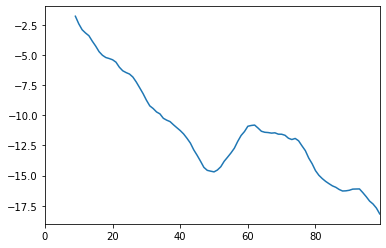

In [38]:
r10.mean()[0:100].plot()

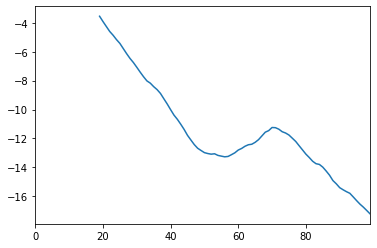

In [39]:
r20.mean()[0:100].plot()

In [40]:
np.random.seed(123456)
df = pd.DataFrame(np.random.randn(50, 4))
df[:5]

,0,1,2,3
0,0.469112,-0.282863,-1.509059,-1.135632
1,1.212112,-0.173215,0.119209,-1.044236
2,-0.861849,-2.104569,-0.494929,1.071804
3,0.721555,-0.706771,-1.039575,0.271860
4,-0.424972,0.567020,0.276232,-1.087401


In [41]:
# sample three random rows
df.sample(n=3)

,0,1,2,3
15,-0.076467,-1.187678,1.130127,-1.436737
28,-2.182937,0.380396,0.084844,0.432390
48,-0.693921,1.613616,0.464000,0.227371


In [42]:
# sample 10% of the rows
df.sample(frac=0.1)

,0,1,2,3
37,1.126203,-0.977349,1.474071,-0.064034
10,-1.294524,0.413738,0.276662,-0.472035
4,-0.424972,0.567020,0.276232,-1.087401
14,0.410835,0.813850,0.132003,-0.827317
48,-0.693921,1.613616,0.464000,0.227371


In [43]:
# 10% with replacement
df.sample(frac=0.1, replace=True)

,0,1,2,3
27,-1.236269,0.896171,-0.487602,-0.082240
9,0.357021,-0.674600,-1.776904,-0.968914
27,-1.236269,0.896171,-0.487602,-0.082240
15,-0.076467,-1.187678,1.130127,-1.436737
9,0.357021,-0.674600,-1.776904,-0.968914


In [44]:
# generate a rolling mean time series
np.random.seed(123456)
data = pd.Series(np.random.normal(0.5, 2, 365*3), 
                 pd.date_range('2013-01-01', periods=365*3))
periods = 100
rolling = data.rolling(
    window=periods,
    min_periods=periods,
    center=False).mean().dropna()
rolling[:5]

2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
Freq: D, dtype: float64

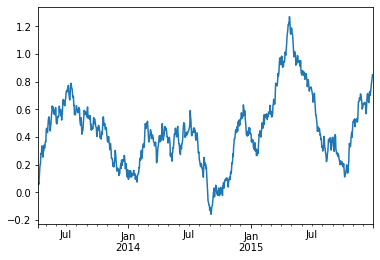

In [47]:
rolling.plot()

In [49]:
# calculate mean and std by year
group_key = lambda x: x.year
groups = rolling.groupby(group_key)
groups.agg([np.mean, np.std])

,mean,std
2013,0.454233,0.171988
2014,0.286502,0.182040
2015,0.599447,0.275786


In [51]:
# normalize to the z-score
z_score = lambda x: (x - x.mean()) / x.std()
normed = rolling.groupby(group_key).transform(z_score)
normed.groupby(group_key).agg([np.mean, np.std])
#結果mean都趨近0; std都1

,mean,std
2013,-3.172066e-17,1.0
2014,-1.881296e-15,1.0
2015,-1.492261e-15,1.0


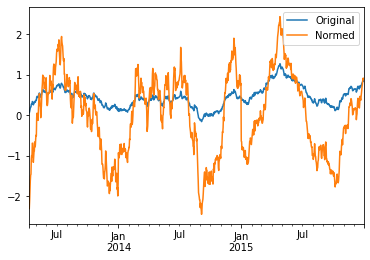

In [52]:
compared = pd.DataFrame({ 'Original': rolling,
                          'Normed': normed })
compared.plot();